스크래핑하고자 하는 사람의 대화명을 입력하세요 : 정진수


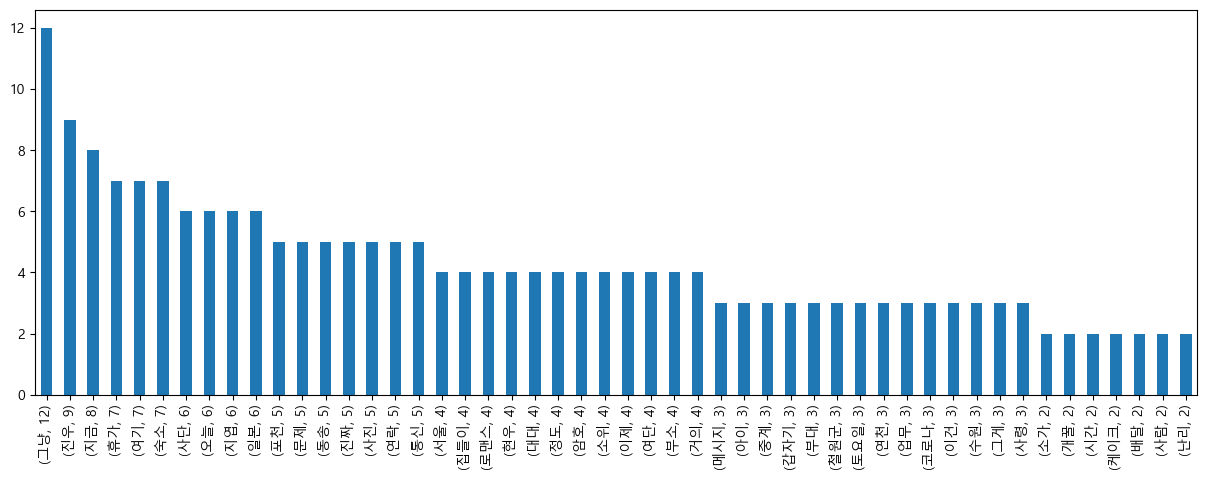

띄우고자 하는 모양을 입력하세요(하트/원/별) : 별


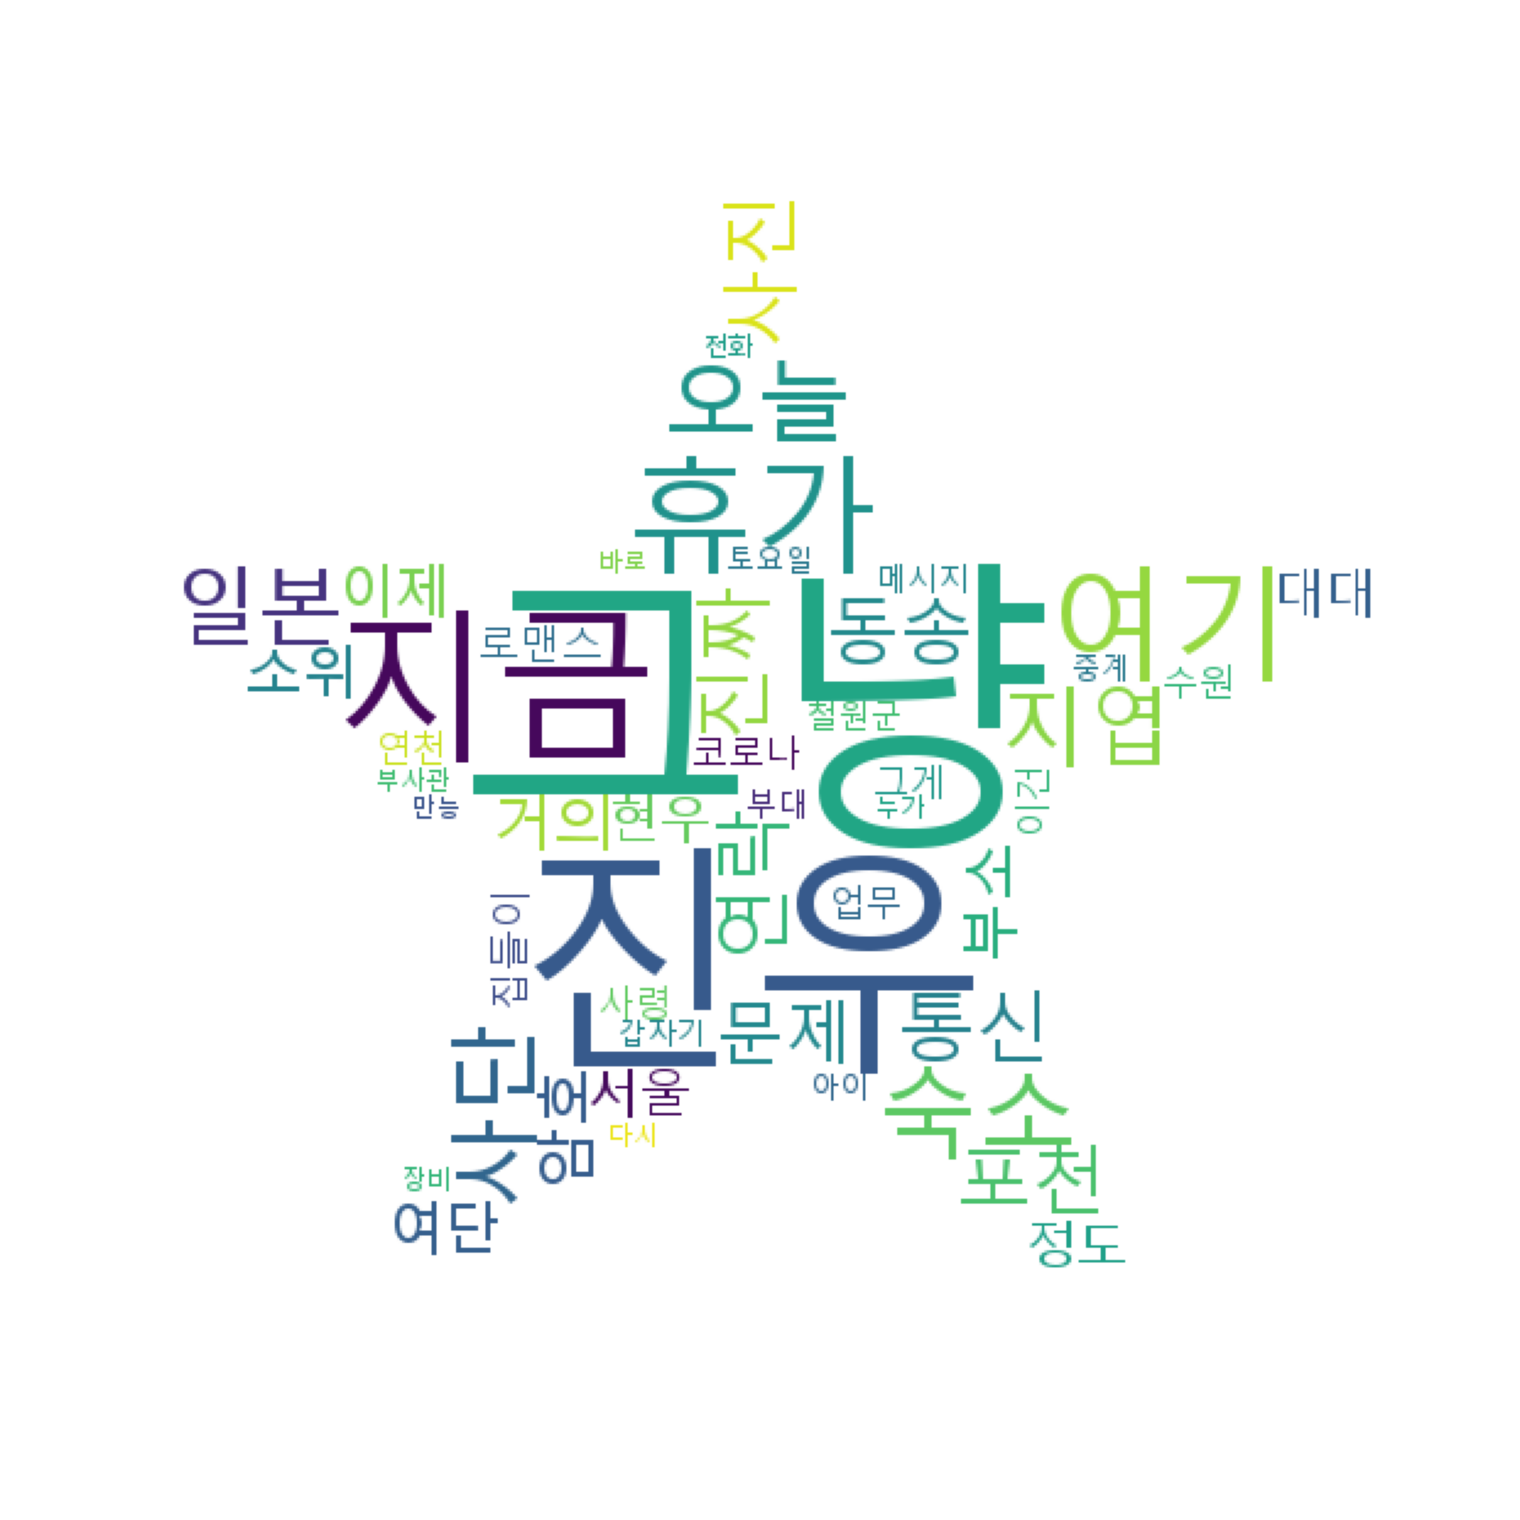

In [7]:
import konlpy
import os, re
import pandas as pd
from konlpy.tag import Okt
from konlpy.tag import Hannanum
from wordcloud import WordCloud

import seaborn as sns
import matplotlib.pyplot as plt
import PIL
from wordcloud import WordCloud

import numpy as np

import nltk
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc

from PIL import Image # 만약 "No module named 'PIL'" 에러가 발생하면 [ pip install Pillow==5.4.1 ] 로 라이브러리를 설치해줍니다.




os.chdir(r'C:\Users\jvend\OneDrive\바탕 화면\Desktop') # 텍스트파일, 이미지파일 경로

name = input("스크래핑하고자 하는 사람의 대화명을 입력하세요 : ")


f = open('chat.txt', 'r', encoding = 'utf8')
script101 = f.read()
Line = re.findall(r'{}.+'.format(name), script101)  #name이 채팅한 모든 글을 스크래핑


# for item in Line:
# 	print(item)  스크래핑 내용 출력

f = open('chat_result.txt', 'w', encoding = 'utf8')  #chat_result 파일에 스크래핑한 채팅 저장
chat_result = ''

for i in Line:
    chat_result += i	+ '\n'
f.write(chat_result)
f.close()	

chat_result2 = open('chat_result.txt', encoding = 'UTF-8').read()  
chat_result2 = re.sub('{}'.format(name), '', chat_result2)
chat_result2 = re.sub('[^가-힣] :', '', chat_result2)


okt = Okt()
nouns = okt.nouns(chat_result2)

del_list = ['오전', '오후','하다', '있다', '되다', '이다', '돼다', '않다', '그렇다', '아니다', '이렇다', '그렇다', '어떻다'] 
# 워드클라우드에서 특정 단어들 제거

df_word = pd.DataFrame({'word' : nouns})
df_word = df_word.astype(str)
df_word['count'] = df_word['word'].str.len()
df_word = df_word.query('count >= 2')
df_word.sort_values('count')

df_list = df_word.values.tolist()

word_cleaned = []
for word in df_list:
    if (len(word[0]) != 1) & (word[0] not in del_list): # 한 글자로 이뤄진 단어들을 제외 & 원치 않는 단어들을 제외
        word_cleaned.append(word[0])

word_dic = {}

for word in word_cleaned:
    if word not in word_dic:
        word_dic[word] = 1 # changed from "0" to "1"
    else:
        word_dic[word] += 1
        
word_dic.items()

sorted_word_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)
sorted_word_dic
    
df = pd.DataFrame(list(sorted_word_dic),sorted_word_dic) 

font_name = matplotlib.font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() # NanumGothic.otf
matplotlib.rc('font', family=font_name)


# 빈도 내림차순으로 정렬합니다.
result = df.sort_values([1], ascending=False)

# 전체 데이터(단어 수)는 너무 많기 때문에 출현 횟수 상위 50개만 가져와 시각화합니다.
result = result[:50]

result.plot(kind='bar', legend=False, figsize=(15,5)) 
# 그림 사이즈를 변경하고 싶을 경우 figsize=(가로, 세로) 를 변경합니다.

plt.show() #그래프 출력

shape = input("띄우고자 하는 모양을 입력하세요(하트/원/별) : ")

python_coloring = np.array(Image.open("{}.jpg".format(shape)))

word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf", # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       width=200, height=100, max_words = 50, max_font_size = 200,
                       mask=python_coloring, # "마스크를 씌운다"라고 표현합니다. (masking)
                       background_color='white').generate_from_frequencies(word_dic)

plt.figure(figsize=(15,15))
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show() #워드클라우드 이미지 출력